In [42]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 



Uploading the data


In [133]:
path='train.csv'
data= pd.read_csv(path,sep=';',decimal=',')
test=pd.read_csv('test.csv',sep=';',decimal=',')
data.head()


,Unnamed: 0,case,run,VB,time,DOC,feed,material,RMS_smcAC,RMS_smcDC,...,curvature_AE_spindle,e_acf1_AE_spindle,e_acf10_AE_spindle,entropy_AE_spindle,x_acf1_AE_spindle,x_acf10_AE_spindle,diff1_acf1_AE_spindle,diff1_acf10_AE_spindle,diff2_acf1_AE_spindle,diff2_acf10_AE_spindle
0,1,1,1,0.00,2,1.5,0.5,1,1.532165,5.883103,...,-55.394516,0.742213,1.441881,0.456223,0.887486,3.065641,0.178543,0.313883,-0.338849,0.265890
1,4,1,4,0.11,7,1.5,0.5,1,1.638718,6.296917,...,-47.988389,0.656443,1.297104,0.465185,0.858973,3.353695,-0.001532,0.389174,-0.391433,0.579529
2,6,1,6,0.20,15,1.5,0.5,1,2.013691,7.747009,...,-63.183783,0.599650,1.054452,0.368215,0.883134,4.950364,-0.191388,0.481253,-0.480702,0.890212
3,7,1,7,0.24,19,1.5,0.5,1,2.061641,8.154872,...,-72.409545,0.512376,0.458965,0.383390,0.886932,6.073526,-0.201718,0.796146,-0.458686,1.290633
4,8,1,8,0.29,22,1.5,0.5,1,2.263880,8.445376,...,-62.994077,0.576020,0.540771,0.427134,0.899203,6.156157,-0.145679,0.399651,-0.471938,0.728646


Separating the target and the features


In [171]:
df=data.copy()
X_train=df.drop(['VB'],axis=1)
Y_train=df['VB']
X_test=test.drop(['ID','VB'], axis=1)
Y_test=test['VB'].astype(float)

Feature selection function

In [172]:
def select(df,n=0.8):
    corr=df.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= n:
            if columns[j]:
                columns[j] = False
    selected_columns = df.columns[columns]
    
    return selected_columns

In [173]:
X_train.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
X_train=X_train.drop(['a'],axis=1) 
columns=select(X_train)
X_train_slct=X_train[columns]
X_test_slct=X_test[columns]

Encoding Categorical features

In [174]:
X_train_cat=pd.get_dummies(X_train[['DOC','feed']],columns=['DOC','feed'], prefix=['DOC_','feed_'])
print(X_train_cat)
X_train_slct=X_train_slct.drop(['DOC','feed'],axis=1)
X_test_cat=pd.get_dummies(X_test[['DOC','feed']],columns=['DOC','feed'], prefix=['DOC_','feed_'])
X_test_slct=X_test_slct.drop(['DOC','feed'],axis=1)

     DOC__0.75  DOC__1.5  feed__0.25  feed__0.5
0            0         1           0          1
1            0         1           0          1
2            0         1           0          1
3            0         1           0          1
4            0         1           0          1
..         ...       ...         ...        ...
100          1         0           0          1
101          1         0           0          1
102          1         0           0          1
103          1         0           0          1
104          1         0           0          1

[105 rows x 4 columns]


In [198]:
X_train_fn=pd.concat([X_train_slct,X_train_cat],axis=1)
X_test_fn=pd.concat([X_test_slct,X_test_cat],axis=1)
X_train_fn.head()

,case,run,material,RMS_smcAC,max_AE_spindle,skewness_vib_table,skewness_vib_spindle,skewness_AE_table,skewness_AE_spindle,kurtosis_AE_spindle,...,trend_AE_spindle,spike_AE_spindle,e_acf1_AE_spindle,entropy_AE_spindle,x_acf1_AE_spindle,diff2_acf1_AE_spindle,DOC__0.75,DOC__1.5,feed__0.25,feed__0.5
0,1,1,1,1.532165,0.429077,-1.076321,-0.405856,0.330280,0.359970,3.157375,...,0.564230,9.356888e-09,0.742213,0.456223,0.887486,-0.338849,0,1,0,1
1,1,4,1,1.638718,0.521240,-1.071159,-0.526945,0.086311,0.552406,3.623208,...,0.590024,9.291575e-09,0.656443,0.465185,0.858973,-0.391433,0,1,0,1
2,1,6,1,2.013691,0.397339,-1.243773,-0.495549,-0.416780,-0.374809,2.654615,...,0.708834,2.629071e-09,0.599650,0.368215,0.883134,-0.480702,0,1,0,1
3,1,7,1,2.061641,0.564575,-1.022797,-0.298155,-0.336624,-0.448444,2.488166,...,0.768904,2.301420e-09,0.512376,0.383390,0.886932,-0.458686,0,1,0,1
4,1,8,1,2.263880,0.511475,-1.126457,3.790775,-0.509940,-0.586659,2.897492,...,0.763389,1.939533e-09,0.576020,0.427134,0.899203,-0.471938,0,1,0,1


Feature scaling

In [139]:
def scaling(df):
   from sklearn import preprocessing

   scaler = preprocessing. StandardScaler().fit(df.values)
   df_scaled = scaler.transform(df.values)
   df_sc=pd.DataFrame(df_scaled,columns=df.columns)

   return df_sc 




In [180]:
X_train_fn_sc=scaling(X_train_fn)
X_test_fn_sc=scaling(X_test_fn)
X_test_fn_sc.head()

,case,run,material,RMS_smcAC,max_AE_spindle,skewness_vib_table,skewness_vib_spindle,skewness_AE_table,skewness_AE_spindle,kurtosis_AE_spindle,...,trend_AE_spindle,spike_AE_spindle,e_acf1_AE_spindle,entropy_AE_spindle,x_acf1_AE_spindle,diff2_acf1_AE_spindle,DOC__0.75,DOC__1.5,feed__0.25,feed__0.5
0,-0.728423,-1.371495,-0.53033,-1.412349,-1.085654,0.142875,-1.317311,0.327978,-0.213388,-0.925083,...,-2.518590,0.678906,0.131302,2.111890,-2.005760,-3.274212,0.53033,-0.53033,0.759555,-0.759555
1,-0.728423,-1.207556,-0.53033,-1.408965,-0.676167,0.152586,-1.314438,0.231212,0.411657,-0.417599,...,-1.990122,0.863204,0.503374,1.394896,-0.985078,-0.925505,0.53033,-0.53033,0.759555,-0.759555
2,-0.728423,-1.043616,-0.53033,-1.301774,-1.162765,0.023203,-1.311293,-0.093709,-0.567750,-1.061941,...,-1.553154,0.009290,0.740444,0.903346,-0.333160,-1.714676,0.53033,-0.53033,0.759555,-0.759555
3,-0.728423,-0.879676,-0.53033,-1.148388,-0.918137,-0.680474,-1.300253,-0.142761,-0.523828,-0.820094,...,-1.113209,-0.036785,0.883749,0.425210,0.139623,0.053245,0.53033,-0.53033,0.759555,-0.759555
4,-0.728423,-0.715737,-0.53033,-1.150473,-0.224135,-0.582137,-1.351719,0.085660,-0.266876,-0.855757,...,-1.102796,0.030791,0.559245,0.250462,-0.291566,1.824784,0.53033,-0.53033,0.759555,-0.759555


Visualisation of the target

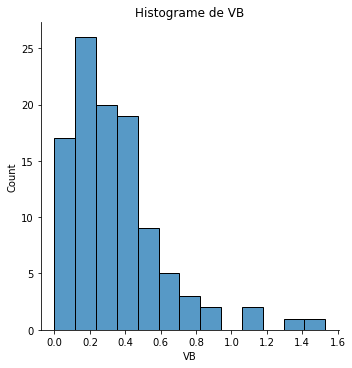

In [5]:
ax= sns.displot(data=Y_train, kde=False)
plt.title('Histograme de VB')
plt.show()


Visualisation of log(Y)

C:\Users\HP\miniconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


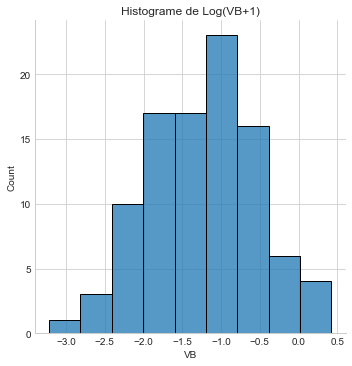

In [238]:
ax= sns.displot(data=np.log(Y_train), kde=False)
plt.title('Histograme de Log(VB+1)')
plt.show()

PLOTTING Y=F(X)

Text(0.5, 1.0, 'Sample Dataset')

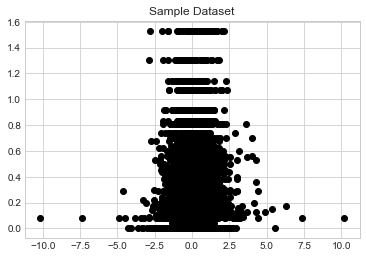

In [143]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')

plt.plot(X_train_fn_sc, Y_train, 'o', color='black');
plt.title("Sample Dataset")

PLOTTING log(Y)=F(X)

Text(0.5, 1.0, 'Sample Dataset')

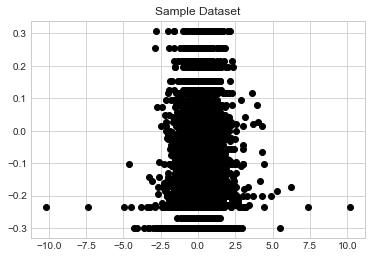

In [222]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')

plt.plot(X_train_fn_sc, np.log10(Y_train+0.5), 'o', color='black');
plt.title("Sample Dataset")

Linear Regression 

In [181]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train_fn_sc, Y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test_fn_sc)

Linear Regression RMSE

In [182]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred,squared=False)

0.2148820335657589

Residuals scatter plot

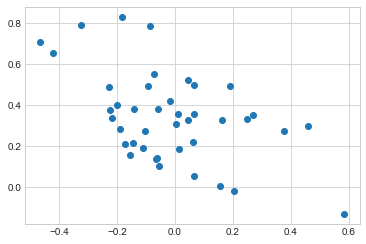

In [183]:
residuals=Y_test-Y_pred
plt.scatter(residuals,Y_pred)

plt.show()

Linear regression for log(Y)

In [185]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train_fn_sc, np.log10(Y_train+1))  # perform linear regression
Y_pred = linear_regressor.predict(X_test_fn_sc)

Linear Regressin RMSE fro log(Y)

In [186]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.log10(Y_test+1),Y_pred,squared=False)

0.059503931968186645

Scatter PLOT 

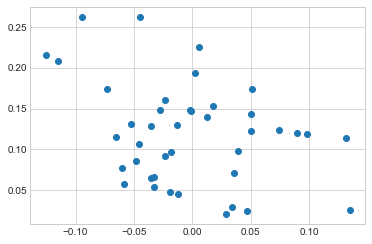

In [188]:
residuals=np.log10(Y_test+1)-Y_pred
plt.scatter(residuals,Y_pred)

plt.show()

R2 SCORE

In [187]:
from sklearn.metrics import r2_score
r2_score(np.log10(Y_test+1),Y_pred)


0.2589607198958569

Random Forest

Paramaters Optimization

In [229]:
from sklearn.model_selection import RandomizedSearchCV
#Random Forest Regressor param_dict
n_estimators = [i for i in range (20,151)] # nombre des arbres
max_depth = [i for i in range (1,21)] # profondeurs des arbres
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
}
# Instanciation du modèle Random Forest
rf = RandomForestRegressor()


rf_random = RandomizedSearchCV(estimator = rf,param_distributions= param_dict)

rf_random.fit(X_train_fn,np.log10(Y_train+1))
#On cherche le meilleur modèle
rf_optimal_model = rf_random.best_params_
rf_optimal_model

{'n_estimators': 134, 'max_depth': 17}

In [230]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=134, max_depth = 17)
model2.fit(X_train_fn,np.log10(Y_train+1))

RandomForestRegressor(max_depth=17, n_estimators=134)

In [231]:
Y_RF=model2.predict(X_test_fn)

RANDOM FOREST RMSE

In [232]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.log10(Y_test+1),Y_RF,squared=False)

0.03765637336510413

SCATTER PLOT

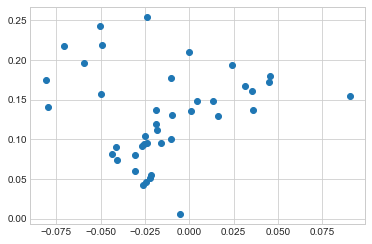

In [200]:
residuals=np.log10(Y_test+1)-Y_RF
plt.scatter(residuals,Y_RF)

plt.show()

RANDOM FOREST R2 SCORE

In [233]:
from sklearn.metrics import r2_score
r2_score(np.log10(Y_test+1),Y_RF)

0.7032252943367296

In [234]:
 from sklearn.metrics import mean_absolute_error
 mean_absolute_error(Y_logtest,Y_RF)

0.03076517746038102

<function matplotlib.pyplot.show(close=None, block=None)>

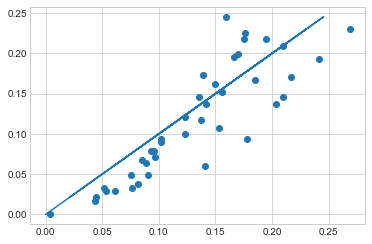

In [235]:
Y_logtest=np.log10(Y_test+1)
plt.scatter(Y_RF,Y_logtest)
plt.plot(Y_logtest,Y_logtest)
plt.show